Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab

Project Euler Problem 396: Weak Goodstein Sequence

https://projecteuler.net/problem=396

In [12]:
M = 15 #Compute G(1) + ... + G(M)
MOD = 10 ** 9

def G_function(i, k): #=G_i(k)
  if i == 0:
    return k+1
  if i == 1:
    return 2*(k+1)
  if i == 2:
    res = (pow(2,k+2,MOD)*(k+2)-2) % MOD
    if res < 7:
      res += MOD
    return res
  if i == 3:
    res = k
    for j in range(k+2):
      res = G_function(2, res)
    return res

G = [0] * (M+1)
total = 0

for n in range(1, M+1):
  N = n.bit_length() - 1
  n0 = n - (1 << N)
  G[n] = G_function(N, G[n0]+1) - 1
  print(f"n = {n:2d}: {G[n]}")
  total = (total + G[n]) % MOD

print("Total: ", total)

n =  1: 1
n =  2: 3
n =  3: 5
n =  4: 21
n =  5: 61
n =  6: 381
n =  7: 2045
n =  8: 722374141
n =  9: 59756541
n = 10: 954333181
n = 11: 955670525
n = 12: 113137661
n = 13: 465147901
n = 14: 353293821
n = 15: 549498365
Total:  173214653


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [8]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


print(round(y.agg(['min', 'max', 'median', 'mean']),2))

print(round(X[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']].agg(['min', 'max', 'median', 'mean']),2 ))



ratio = X['AveOccup'] / X['AveRooms']

# 畫 histogram
plt.figure(figsize=(8,5))
plt.hist(np.log1p(ratio), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("log(1 + AveOccup / AveRooms)")
plt.ylabel("Count")
plt.title("Histogram of log-transformed AveOccup / AveRooms")
plt.show()

HTTPError: HTTP Error 403: Forbidden

In [7]:
df = X.copy()
df['median_house_value'] = y

correlations = df.corr()['median_house_value'].sort_values(ascending=False)
print("Correlation with y:\n", round(correlations,2))

Correlation with y:
 median_house_value    1.00
MedInc                0.69
AveRooms              0.15
HouseAge              0.11
AveOccup             -0.02
Population           -0.02
Longitude            -0.05
AveBedrms            -0.05
Latitude             -0.14
Name: median_house_value, dtype: float64


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("VIF:\n", round(vif_data,2))

VIF:
       feature     VIF
0      MedInc   11.47
1    HouseAge    7.17
2    AveRooms   46.28
3   AveBedrms   43.06
4  Population    2.91
5    AveOccup    1.23
6    Latitude  558.88
7   Longitude  631.39


In [119]:
from scipy.stats import zscore
df = X_train.copy()
df['median_house_value'] = y_train  # 合併 X 和 y


# 計算 Z-score
z_scores = np.abs(zscore(df))

outliers = df[(z_scores > 5).any(axis=1)]
print("Number of outliers:", outliers.shape[0])
print(outliers)

# z > 3 被視為 outlier
df_no_outlier = df[(z_scores < 5).all(axis=1)]

# 分開 X 和 y
X_train = df_no_outlier.drop(columns=['median_house_value'])
y_train = df_no_outlier['median_house_value']



Number of outliers: 220
        MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  \
15698  14.2959      52.0   8.172727   0.872727       304.0  2.763636   
19976   3.1250      10.0  21.095238   5.285714        48.0  2.285714   
8850   15.0001      37.0   9.333333   1.037801       809.0  2.780069   
8847   15.0001      45.0  10.370656   1.092664       857.0  3.308880   
2397    5.1314      15.0  29.074766   6.084112       276.0  2.579439   
...        ...       ...        ...        ...         ...       ...   
5272   13.6842      43.0   8.464844   0.992188       761.0  2.972656   
1913    4.0714      19.0  61.812500  11.000000       112.0  2.333333   
9744    3.2652      12.0   4.399360   1.027447     12153.0  2.779735   
8467    2.6689      12.0   2.929515   1.068429      7429.0  2.181791   
14505   3.6287       4.0   3.900623   1.097941      7604.0  1.820881   

       Latitude  Longitude  median_house_value  
15698     37.79    -122.46             5.00001  
19976     36.

Slope:  [ 4.70761211e-01  1.16514308e-02 -1.36010284e-01  1.05425639e+00
  3.18266828e-05 -2.34389196e-01 -4.11874619e-01 -4.12243699e-01]
Intercept:  -34.46239471979094
MSE: 0.4575753379719351
MAE: 0.4913965691746171
R^2: 0.6538350212667547
MSE: 0.49308685758313525
MAE: 0.5043239890935904
R^2: 0.621912157351882


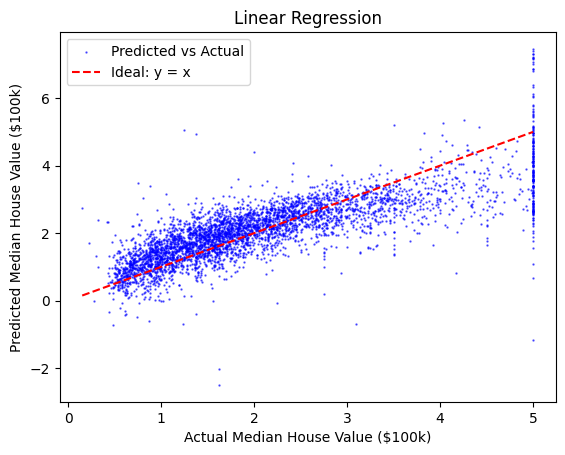

       MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
4861   0.4999      29.0  2.373272   1.055300      2690.0  12.396313     34.02   
12138  2.6250      16.0  4.000000   0.500000        39.0   2.785714     33.87   
19524  0.9573      19.0  2.951220   1.000000       658.0  16.048780     37.64   
10574  1.9659       6.0  4.795455   1.159091       125.0   2.840909     33.72   
20527  1.4653       7.0  3.525794   1.017857      4479.0   8.886905     38.54   

       Longitude   y_test    y_pred  residual  
4861     -118.28  5.00001 -1.171141  6.171151  
12138    -117.22  5.00001  0.664176  4.335834  
19524    -121.00  1.62500 -2.499689  4.124689  
10574    -117.70  5.00001  1.073502  3.926508  
20527    -121.79  3.10000 -0.704421  3.804421  


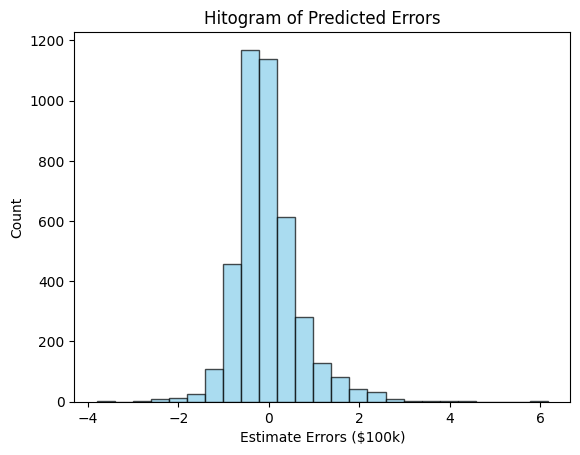

In [120]:
# Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)
print("Slope: ", model.coef_)

#觀察：Population很沒用

print("Intercept: ", model.intercept_)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


#Ein

# MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

# R^2
r2 = r2_score(y_train, y_pred_train)
print("R^2:", r2)


#Eout

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# 畫 scatter plot
plt.scatter(y_test, y_pred, s=0.5, color="blue", alpha=0.6, label="Predicted vs Actual")

# 畫對角線 (理想情況)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Ideal: y = x")

plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Histogram
residuals = y_test - y_pred
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_pred'] = y_pred
df_test['residual'] = residuals.abs()  # 取絕對值
top5_outliers = df_test.sort_values(by='residual', ascending=False).head(5)
print(top5_outliers)


plt.hist(residuals, bins=25, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Estimate Errors ($100k)")
plt.ylabel("Count")
plt.title("Hitogram of Predicted Errors")
plt.show()

Best parameters: {'pca__n_components': 7, 'ridge__alpha': np.float64(21.54434690031882)}
Ridge coeff: [0.02676492 0.13648551 0.02638313 0.6742518  0.33181502 0.31277986
 1.19901881]
MSE: 0.5343288980480978
MAE: 0.5297855989054768
R^2: 0.6007618976582678
MSE: 0.5353721222213156
MAE: 0.534762273327524
R^2: 0.5894243571837303


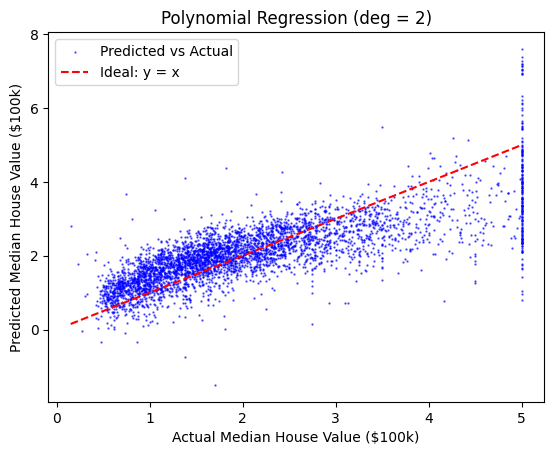

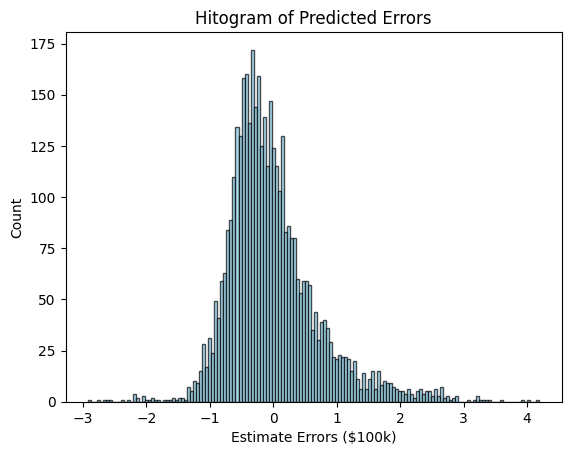

In [131]:
# Polynomial Regression + RidgeCV


pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=43)),
    ("ridge", Ridge())
])

param_grid = {
    "pca__n_components": [1, 2, 3, 4, 5, 6, 7],  # PCA 維度
    "ridge__alpha": np.logspace(-4, 4, 10)  # Ridge alpha
}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

"""
mean_cv_errors = -grid.cv_results_["mean_test_score"]  # cross_val_score 會回傳負 MSE
plt.figure(figsize=(6,4))
plt.semilogx(alphas, mean_cv_errors, marker='o')
plt.xlabel("alpha")
plt.ylabel("CV Mean Squared Error")
plt.title("GridSearchCV: CV Error vs alpha")
plt.grid(True)
plt.show()


best_alpha = grid.best_params_["ridge__alpha"]
print("best alpha:", best_alpha)"""



best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

ridge_coef = best_model.named_steps["ridge"].coef_
print("Ridge coeff:", ridge_coef)

#Ein

# MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

# R^2
r2 = r2_score(y_train, y_pred_train)
print("R^2:", r2)

# Eout
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# R^2是負的，比猜平均還慘，可以試試robust poly regression

# 畫 scatter plot
plt.scatter(y_test, y_pred, s=0.5, color="blue", alpha=0.6, label="Predicted vs Actual")

# 畫對角線 (理想情況)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Ideal: y = x")
plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Polynomial Regression (deg = 2)")
plt.legend()
plt.show()

# Histogram
residuals = y_test - y_pred

plt.hist(residuals, bins=150, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Estimate Errors ($100k)")
plt.ylabel("Count")
plt.title("Hitogram of Predicted Errors")
plt.show()

MSE: 0.7174133002277043
MAE: 0.6411972588374875
R^2: 0.46396549835894163
MSE: 0.7433721711112772
MAE: 0.6538462986257426
R^2: 0.4299096005608437


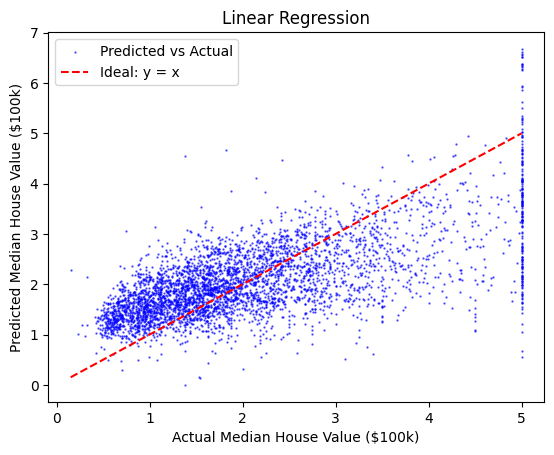

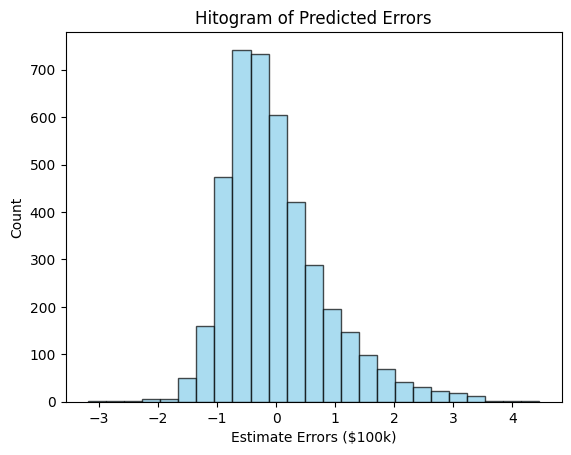

In [66]:
# PCA

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("lr", LinearRegression())
])

pipeline.fit(X_train, y_train)


y_pred_train = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)
#Ein

# MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE:", mae)

# R^2
r2 = r2_score(y_train, y_pred_train)
print("R^2:", r2)


#Eout

# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# 畫 scatter plot
plt.scatter(y_test, y_pred, s=0.5, color="blue", alpha=0.6, label="Predicted vs Actual")

# 畫對角線 (理想情況)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Ideal: y = x")

plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Histogram
residuals = y_test - y_pred

plt.hist(residuals, bins=25, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Estimate Errors ($100k)")
plt.ylabel("Count")
plt.title("Hitogram of Predicted Errors")
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here